In [ ]:
# HW4-1：使用 CWA F-A0010-001 API 取得氣象預報 JSON 資料
import requests
import json

url = "https://opendata.cwa.gov.tw/fileapi/v1/opendataapi/F-A0010-001?Authorization=CWA-46BB6862-4230-4949-BB67-98D753EDA57D&downloadType=WEB&format=JSON"

# 呼叫 API 並取得 JSON
response = requests.get(url)
data = response.json()

# 正確資料路徑：取得 agrWeatherForecasts 區塊
main_data = data["cwaopendata"]["resources"]["resource"]["data"]["agrWeatherForecasts"]

# 印出觀察用 JSON 結構
print(json.dumps(main_data, indent=2, ensure_ascii=False))


{
  "weatherProfile": "3日東北季風增強,中部以北、東北部及東部天氣明顯轉涼,其他地區早晚亦涼;基隆北海岸、大臺北及宜蘭地區有雨,並有局部較大雨勢發生的機率,桃園、新竹、東部、東南部地區及恆春半島有局部短暫雨,苗栗及中南部山區亦有零星短暫雨,其他地區為多雲。4日、5日東北季風影響,北部、東北部及東部天氣較涼,其他地區早晚亦涼;基隆北海岸、大臺北山區、東北部地區有局部短暫雨,桃園以北、東部、東南部地區及恆春半島亦有零星短暫雨,其他地區為多雲到晴。6日、7日東北季風稍減弱,各地氣溫逐漸回升,早晚仍較涼,中南部日夜溫差大;各地大多為晴到多雲,僅基隆北海岸、大臺北山區、東半部地區及恆春半島有局部短暫雨。8日東北季風再增強,9日東北季風影響,北部及東北部天氣稍轉涼,其他地區早晚亦涼;桃園以北、東半部地區及恆春半島有局部短暫雨,其他地區為多雲到晴。",
  "weatherForecasts": {
    "location": [
      {
        "locationName": "北部地區",
        "weatherElements": {
          "Wx": {
            "daily": [
              {
                "dataDate": "2025-12-03",
                "weather": "陰時多雲有雨",
                "weatherid": "13"
              },
              {
                "dataDate": "2025-12-04",
                "weather": "多雲短暫雨",
                "weatherid": "8"
              },
              {
                "dataDate": "2025-12-05",
                "weather": "多雲短暫雨",
                "weatherid": "8"
              },
              {
           

In [ ]:
# HW4-2：從結構化 JSON 中提取每日氣溫資料（F-A0010-001）
import requests
import json


url = f"https://opendata.cwa.gov.tw/fileapi/v1/opendataapi/F-A0010-001?Authorization=CWA-46BB6862-4230-4949-BB67-98D753EDA57D&downloadType=WEB&format=JSON"

response = requests.get(url)
data = response.json()

# 正確資料位置
locations = data["cwaopendata"]["resources"]["resource"]["data"]["agrWeatherForecasts"]["weatherForecasts"]["location"]

# 儲存每日結果
region_data = []

for loc in locations:
    region_name = loc["locationName"]

    maxT_daily = loc["weatherElements"]["MaxT"]["daily"]
    minT_daily = loc["weatherElements"]["MinT"]["daily"]

    # 確保每日長度一致
    for max_day, min_day in zip(maxT_daily, minT_daily):
        region_data.append({
            "regionName": region_name,
            "dataDate": max_day["dataDate"],  # 日期一樣，可從任一方取
            "mint": int(min_day["temperature"]),
            "maxt": int(max_day["temperature"])
        })

# 印出所有資料
for item in region_data:
    print(item)


{'regionName': '北部地區', 'dataDate': '2025-12-03', 'mint': 15, 'maxt': 21}
{'regionName': '北部地區', 'dataDate': '2025-12-04', 'mint': 14, 'maxt': 21}
{'regionName': '北部地區', 'dataDate': '2025-12-05', 'mint': 15, 'maxt': 23}
{'regionName': '北部地區', 'dataDate': '2025-12-06', 'mint': 15, 'maxt': 24}
{'regionName': '北部地區', 'dataDate': '2025-12-07', 'mint': 15, 'maxt': 24}
{'regionName': '北部地區', 'dataDate': '2025-12-08', 'mint': 16, 'maxt': 23}
{'regionName': '北部地區', 'dataDate': '2025-12-09', 'mint': 17, 'maxt': 23}
{'regionName': '中部地區', 'dataDate': '2025-12-03', 'mint': 16, 'maxt': 24}
{'regionName': '中部地區', 'dataDate': '2025-12-04', 'mint': 15, 'maxt': 25}
{'regionName': '中部地區', 'dataDate': '2025-12-05', 'mint': 16, 'maxt': 26}
{'regionName': '中部地區', 'dataDate': '2025-12-06', 'mint': 16, 'maxt': 26}
{'regionName': '中部地區', 'dataDate': '2025-12-07', 'mint': 16, 'maxt': 27}
{'regionName': '中部地區', 'dataDate': '2025-12-08', 'mint': 16, 'maxt': 26}
{'regionName': '中部地區', 'dataDate': '2025-12-09', 'm

In [ ]:
#HW4-3
import sqlite3
import pandas as pd

# 連接 SQLite 資料庫
conn = sqlite3.connect("data.db")
cursor = conn.cursor()

# 印出整張表格內容（全部資料）
print("✅ 全部氣溫資料：")
df_all = pd.read_sql_query("SELECT * FROM TemperatureForecasts", conn)
print(df_all.to_string(index=False))  # 不加 index 顯示，乾淨整齊

# 查詢所有地區名稱
print("\n✅ 所有地區名稱：")
region_df = pd.read_sql_query("SELECT DISTINCT regionName FROM TemperatureForecasts", conn)
for region in region_df["regionName"]:
    print("-", region)

# 查詢中部地區氣溫資料
print("\n✅ 中部地區氣溫資料：")
df_mid = pd.read_sql_query("""
    SELECT dataDate, mint, maxt
    FROM TemperatureForecasts
    WHERE regionName = '中部地區'
    ORDER BY dataDate
""", conn)
print(df_mid.to_string(index=False))

conn.close()


✅ 全部氣溫資料：
 id regionName   dataDate  mint  maxt
169       北部地區 2025-05-13    19    31
170       北部地區 2025-05-14    20    31
171       北部地區 2025-05-15    21    31
172       北部地區 2025-05-16    21    32
173       北部地區 2025-05-17    23    31
174       北部地區 2025-05-18    24    31
175       北部地區 2025-05-19    24    32
176       中部地區 2025-05-13    21    32
177       中部地區 2025-05-14    22    33
178       中部地區 2025-05-15    22    33
179       中部地區 2025-05-16    23    33
180       中部地區 2025-05-17    24    33
181       中部地區 2025-05-18    24    34
182       中部地區 2025-05-19    25    33
183       南部地區 2025-05-13    23    33
184       南部地區 2025-05-14    23    33
185       南部地區 2025-05-15    24    33
186       南部地區 2025-05-16    24    34
187       南部地區 2025-05-17    25    34
188       南部地區 2025-05-18    25    33
189       南部地區 2025-05-19    25    34
190      東北部地區 2025-05-13    19    29
191      東北部地區 2025-05-14    20    30
192      東北部地區 2025-05-15    22    29
193      東北部地區 2025-05-16    22    30
19

In [ ]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 97.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 103.8 MB/s eta 0:00:00


2025-12-03 02:04:24.138 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 02:04:24.520 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-12-03 02:04:24.529 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 02:04:24.532 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 02:04:24.555 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 02:04:24.569 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 02:04:24.580 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 02:04:24.585 Thread 'MainThread': mi

DeltaGenerator()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28331 (\N{CJK UNIFIED IDEOGRAPH-6EAB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21271 (\N{CJK UNIFIED IDEOGRAPH-5317}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37096 (\N{CJK UNIFIED IDEOGRAPH-90E8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22320 (\N{CJK UNIFIED IDEOGRAPH-5730}) missing from font(s) DejaVu Sans.
  fig.canvas

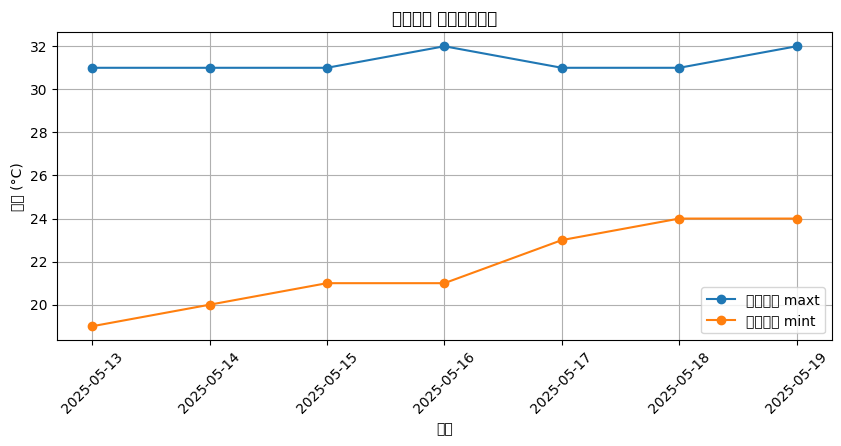

In [ ]:
import streamlit as st
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import rcParams

# 設定支援中文字體（Windows 通用：微軟正黑體）
rcParams['font.family'] = 'Microsoft JhengHei'

# 避免負號亂碼
rcParams['axes.unicode_minus'] = False

# 頁面標題
st.title("🌤️ 氣溫預報 Web App")

# 連接 SQLite 資料庫
conn = sqlite3.connect("data.db")
df = pd.read_sql_query("SELECT * FROM TemperatureForecasts", conn)

# 地區選單
regions = df["regionName"].unique()
selected_region = st.selectbox("請選擇地區：", regions)

# 篩選該地區資料並排序
region_df = df[df["regionName"] == selected_region].sort_values("dataDate")

# 顯示氣溫表格
st.subheader(f"📋 {selected_region} 地區氣溫資料")
st.dataframe(region_df[["dataDate", "mint", "maxt"]], use_container_width=True)

# 畫折線圖
st.subheader(f"📈 {selected_region} 一週氣溫變化圖")

plt.figure(figsize=(10, 4))
plt.plot(region_df["dataDate"], region_df["maxt"], marker='o', label="最高氣溫 maxt")
plt.plot(region_df["dataDate"], region_df["mint"], marker='o', label="最低氣溫 mint")
plt.xlabel("日期")
plt.ylabel("溫度 (°C)")
plt.xticks(rotation=45)
plt.title(f"{selected_region} 一週氣溫變化")
plt.grid(True)
plt.legend()
st.pyplot(plt)
